In [36]:
import numpy as np

char_arr = np.array(['A', 'B', 'C' , 'C' , 'E' ])


In [37]:
print(char_arr)

['A' 'B' 'C' 'C' 'E']


In [38]:
print(char_arr[[True, False, False, True, False]])

['A' 'C']


In [39]:
#위의 방식을 이용할 수 있다.
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [40]:
 print(pd.unique(fish['Species'])) #분류 대상 클래스들을 출력!

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [41]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [42]:
print(fish_input)

[[2.42000e+02 2.54000e+01 3.00000e+01 1.15200e+01 4.02000e+00]
 [2.90000e+02 2.63000e+01 3.12000e+01 1.24800e+01 4.30560e+00]
 [3.40000e+02 2.65000e+01 3.11000e+01 1.23778e+01 4.69610e+00]
 [3.63000e+02 2.90000e+01 3.35000e+01 1.27300e+01 4.45550e+00]
 [4.30000e+02 2.90000e+01 3.40000e+01 1.24440e+01 5.13400e+00]
 [4.50000e+02 2.97000e+01 3.47000e+01 1.36024e+01 4.92740e+00]
 [5.00000e+02 2.97000e+01 3.45000e+01 1.41795e+01 5.27850e+00]
 [3.90000e+02 3.00000e+01 3.50000e+01 1.26700e+01 4.69000e+00]
 [4.50000e+02 3.00000e+01 3.51000e+01 1.40049e+01 4.84380e+00]
 [5.00000e+02 3.07000e+01 3.62000e+01 1.42266e+01 4.95940e+00]
 [4.75000e+02 3.10000e+01 3.62000e+01 1.42628e+01 5.10420e+00]
 [5.00000e+02 3.10000e+01 3.62000e+01 1.43714e+01 4.81460e+00]
 [5.00000e+02 3.15000e+01 3.64000e+01 1.37592e+01 4.36800e+00]
 [3.40000e+02 3.20000e+01 3.73000e+01 1.39129e+01 5.07280e+00]
 [6.00000e+02 3.20000e+01 3.72000e+01 1.49544e+01 5.17080e+00]
 [6.00000e+02 3.20000e+01 3.72000e+01 1.54380e+01 5.580

In [43]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [44]:
fish_target = fish[['Species']].to_numpy()

In [45]:
print(fish_target[:5])

[['Bream']
 ['Bream']
 ['Bream']
 ['Bream']
 ['Bream']]


In [46]:
#레이블과 레이블이 아닌 데이터를 분리한 후 진행관정 中
from sklearn.model_selection import train_test_split


In [47]:
train_input, test_input, train_target, test_target = train_test_split( fish_input, fish_target, random_state=42)

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
ss = StandardScaler()

In [50]:
ss.fit(train_input)

StandardScaler()

In [51]:
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [52]:
##LOGISTIC REGRESSION
import matplotlib.pyplot as plt

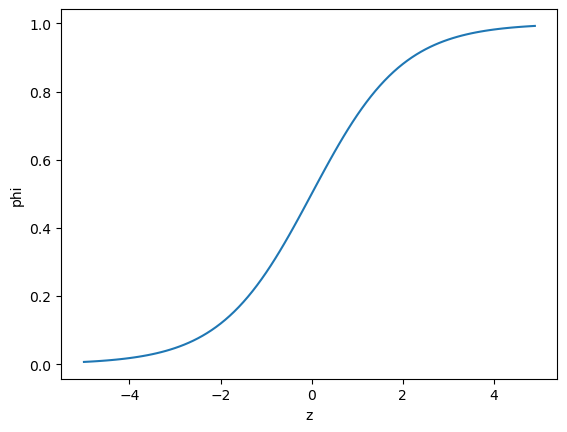

In [53]:
z = np.arange(-5, 5, 0.1)
phi = 1/(1+np.exp(-z))
plt.plot(z,phi)

plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [54]:
#k 최근접 이웃 알고리즘
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors = 3)

In [55]:
kn.fit(train_scaled, train_target)

C:\Users\whdng\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [56]:
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [57]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [58]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [59]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [60]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[[['Roach']
  ['Perch']
  ['Perch']]]


In [67]:
#로지스틱 회귀 이진 분류

bream_smelt_indexes = (train_target == 'Bream')|(train_target == 'Smelt')


In [69]:
import numpy as np

# bream_smelt_indexes 배열을 사용하여 조건을 충족하는 행의 인덱스를 구합니다.
selected_indexes = np.where(bream_smelt_indexes)[0]

# train_scaled 배열에서 조건을 충족하는 행을 선택합니다.
train_smelt_data = train_scaled[selected_indexes]


In [70]:
bream_smelt_indexes

array([[ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [

In [71]:
selected_indexes

array([  0,   2,   7,  11,  15,  16,  19,  21,  25,  28,  33,  36,  37,
        43,  49,  51,  54,  58,  65,  67,  77,  79,  82,  83,  87,  93,
        97,  99, 102, 103, 112, 113, 116], dtype=int64)

In [73]:
selected_indexes1 = np.where(bream_smelt_indexes)[0]
target_bream_smelt = train_target[selected_indexes1]

In [75]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_smelt_data, target_bream_smelt)

C:\Users\whdng\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [77]:
print(lr.predict(train_smelt_data[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [78]:
print(lr.predict_proba(train_smelt_data[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [79]:
print(lr.classes_)

['Bream' 'Smelt']


In [80]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [82]:
decisions = lr.decision_function(train_smelt_data[:5])

In [83]:
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [86]:
from scipy.special import expit

In [87]:
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [88]:
 ##로지스틱 회귀 다중 분류
    
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))

0.9327731092436975


C:\Users\whdng\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [89]:
print(lr.score(test_scaled, test_target))

print(lr.predict(test_scaled[:5]))

proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

print(lr.classes_)

print(lr.coef_.shape, lr.intercept_.shape)

decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

from scipy.special import softmax

proba = softmax(decision, axis = 1)
print(np.round(proba, decimals=3))



0.925
['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
(7, 5) (7,)
[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
